In [40]:
import numpy 
import math
import cvxpy as cvx
from numpy import *
from cvxpy import *
import pandas as pd

# Exersise 1: Sensitivity Analysis

## Q1   
**Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.**

**- Deicision Varaibles**

Let  𝑖 be in the index for the advertisers:

\begin{equation}
i=\begin{cases}
1 \quad\text{ if advertiser is GEICO} \\
2 \quad \text{ if advertiser is Delta}\\
3 \quad\text{ if advertiser is T-Mobile}\\
4 \quad\text{ if advertiser is Capital One}
\end{cases}
\end{equation}

Let j be the index for the news section:

\begin{equation}
j=\begin{cases}
1 \quad\text{ if news section is Sport} \\
2 \quad \text{ if news section is National}
\end{cases}
\end{equation}

Let $x_{ij}$ be the number of page view for company i in news section j.

**- Objective function**

Objective for Washington Post is to maximize ads revenue by allocating the pageview accordingly to gain highest total chaging of the advertisers.  

Let $c_{ij}$ be the Click Through Rate of company i in news section j.Washington Post receives $2.40 per click-through from each of the four companies. 
  
The objective function is:  
\begin{equation}
Maximize \quad 2.4\times \sum_{i=1}^4\sum_{j=1}^{2}  c_{ij}\times x_{ij}
\end{equation}

**- Constraint**   
1)
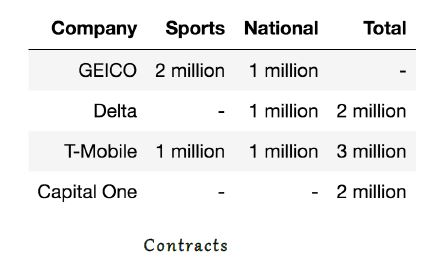
The contracts table constraints:

\begin{align}
x_{11}&\geq 2,000,000\\
x_{12}&\geq 1,000,000\\
x_{22}&\geq 1,000,000\\
x_{21}+x_{22}&\geq 2,000,000\\
x_{31}&\geq 1,000,000\\
x_{32}&\geq 1,000,000\\
x_{31}+x_{32}&\geq 3,000,000\\
x_{41}+x_{42}&\geq 2,000,000\\
\end{align}  
  
2)
Since the sports section gets 6 million views per day and National section gets five million views per day, the page view constraint is:
\begin{align}
\sum_{i=1}^{4}x_{i1}&\leq 6,000,000\\
\sum_{i=1}^{4}x_{i2}&\leq 5,000,000\\
\end{align}


## Q2. 
**What is the optimal solution? Give the values of the decision variables and the optimal objective function value.**

In [50]:
def opt_rev(matrix):

    mtx1=matrix[0]
    mtx2=matrix[1]
    x1=cvx.Variable((4,1),integer=True)
    x2=cvx.Variable((4,1),integer=True)

    #Objective Function
    Z1=sum(mtx1*x1)*2.4/100
    Z2=sum(mtx2*x2)*2.4/100
    objective = cvx.Maximize((Z1+Z2))

    #Constraints
    c1=(sum(x1))<=6*1000000
    c2=(sum(x2))<=5*1000000
    c3=x1[0]>=2*1000000 
    c4=x2[0]>=1*1000000 
    c5=x2[1]>=1*1000000 
    c6=x1[1]+x2[1]==2*1000000 
    c7=x1[2]>=1*1000000
    c8=x2[2]>=1*1000000
    c9=x1[2]+x2[2]==3*1000000 
    c10=x1[3]+x2[3]==2*1000000
    c=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,x1>=0,x2>=0]

    # Form and solve the problem
    prob = cvx.Problem(objective, c)
    result = prob.solve()

    # Print out the results
    print('The optimal revenue is ')
    print(prob.value)
    print('The optimal allocation in the sports category is')
    print(x1.value)
    print('The optimal allocation in the national category is')
    print(x2.value)

In [52]:
wst_mtx = matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.0,2.0]])
opt_rev(wst_mtx)

The optimal revenue is 
523200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


## Q3
**Conduct sensitivity analyses of the optimal solution to different click-through rates as given
in the table below. Do one cell at time if you want, e.g., sensitivity of the solution to
different CTRs for GEICO in the Sports section, then in the National section; then do the
same for each advertiser.** 

|        | Sports     | National   |
|-----------|--------------|-------------|
|   Geico  |  2% - 3%    |  0.1%-1.1%  |  
|   Delta  | 1.5% - 2.5%  | 0.5% - 1.5% |
| T-mobile  | 0.5% - 1.5%  | 2.5% - 3.5% |
|Capital One| 1.5% - 2.0%  | 1.5% - 2.5% |

In [53]:
# Geico #
print("For Geico - Sport CTR change")
opt_rev(matrix([[2.0,2.0,1.0,1.5],[0.8,1.0,3.0,2.0]])) # ctr=2%
opt_rev(matrix([[3.0,2.0,1.0,1.5],[0.8,1.0,3.0,2.0]])) # ctr=3%
print("\n\nFor Geico - National CTR change")
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.1,1.0,3.0,2.0]])) # ctr=0.1%
opt_rev(matrix([[2.5,2.0,1.0,1.5],[1.1,1.0,3.0,2.0]])) # ctr=1.1%

For Geico - Sport CTR change
The optimal revenue is 
487200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
559200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


For Geico - National CTR change
The optimal revenue is 
506400.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
530400.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


In [54]:
# Delta #
print("For delta - Sport CTR change")
opt_rev(matrix([[2.5,1.5,1.0,1.5],[0.8,1.0,3.0,2.0]])) # ctr=1.5%
opt_rev(matrix([[2.5,2.5,1.0,1.5],[0.8,1.0,3.0,2.0]])) # ctr=2.5%
print("\n\nFor delta - National CTR change")
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,0.5,3.0,2.0]])) # ctr=0.5%
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.5,3.0,2.0]])) # ctr=1.5%

For delta - Sport CTR change
The optimal revenue is 
511200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
535200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


For delta - National CTR change
The optimal revenue is 
511200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
535200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


In [55]:
# T-mobile #

print("For T-mobile - Sport CTR change")
opt_rev(matrix([[2.5,2.0,0.5,1.5],[0.8,1.0,3.0,2.0]])) # ctr=0.5%
opt_rev(matrix([[2.5,2.0,1.5,1.5],[0.8,1.0,3.0,2.0]])) # ctr=1./5%
print("\n\nFor T-mobile - National CTR change")
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,2.5,2.0]])) # ctr=2.5%
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.5,2.0]])) # ctr=3.5%

For T-mobile - Sport CTR change
The optimal revenue is 
511200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
535200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


For T-mobile - National CTR change
The optimal revenue is 
499200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
547200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


In [56]:
# Capital One #
print("For T-mobile - Sport CTR change")
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.0,2.0]])) # ctr=1.5%
opt_rev(matrix([[2.5,2.0,1.0,2.0],[0.8,1.0,3.0,2.0]]))# ctr=2.0%
print("\n\nFor T-mobile - National CTR change")
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.0,1.5]])) # ctr=1.5%
opt_rev(matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.0,2.5]])) # ctr=2.5%

For T-mobile - Sport CTR change
The optimal revenue is 
523200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
535200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


For T-mobile - National CTR change
The optimal revenue is 
511200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]
The optimal revenue is 
535200.0
The optimal allocation in the sports category is
[[3000000.]
 [1000000.]
 [1000000.]
 [1000000.]]
The optimal allocation in the national category is
[[1000000.]
 [1000000.]
 [2000000.]
 [1000000.]]


## Q4
**Write no more than one paragraph (no more than 300 words) to describe the results of your analyses. Tables or graphs can be provided as supplemental material.**

Generally the optimal revenue increases with each 0.1% increase of the CTR of each company in each section (except for Capital One-Nation, the optimal revenue remains the same when CTR is between 1.5 to 2.0%). The [increased revenue for each 0.1% increase of CTR] remains the same in the float range of CTR for Geico-National, Delta-Sports, Delta-National, T-Mobile-Sports and Capital One-Sports, among which the last one has the highest value of revenue increase (4800), and the others are the same (2400). For Geico-Sports, T-mobile-National and Capital-One National, the [revenue increase for each 0.1% increase of CTR] increases 2400 (7200-4800) and then remains at that new level when the CTR of them increase 0.1% from the original setting value. Therefore, Geico-Sports and T-mobile-National are the most worthy ones to work on to increase their CTR, because the [extra revenue that each 0.1% increase of CTR brought for the company] is the largest, and it starts to significantly increase when the CTR exceeds the original CTR.

# Exercise 2: Operations Excellence

## Q1
**Write the optimization models for each plant, i.e., make sure to detail the decision variables, the objective
function and the constraints**

**- Decision Variable**

Let  𝑖 be in the index for prodct type:
\begin{equation}
i=\begin{cases}
1 \quad\text{ "standard" product} \\
2 \quad \text{ "deluxe" product}\\
\end{cases}
\end{equation}

Let j be in the index for plant:
\begin{equation}
j=\begin{cases}
1 \quad\text{ plant A } \\
2 \quad \text{ plant B }\\
\end{cases}
\end{equation}

**- The Objective function**  
'My'objective is to optimize the profit in a week by operating plant A&B to product standard and deluxe products. And I need to adjust the resource according to profit contribution.  
Let x be the product unit.
\begin{equation}
Maximize \quad 10\times \sum_{j=1}^{2} x_{1j} + 15 \times \sum_{j=1}^{2}\ x_{2j}
\end{equation}

**- Constraints**  
The constraints lie in: 1) producing capability 2) raw material;

1) producing capacity:
\begin{align}
4x_{11} + 3x_{21}&\leq 80\\ 
2x_{11} + 5x_{21}&\leq 60\\ 
5x_{12} + 3x_{22}&\leq 60\\
5x_{12} + 6x_{22}&\leq 75\\
\end{align}

2) raw material
\begin{align}
4\times (x_{11} + x_{21})&\leq 75\\
4\times (x_{12} + x_{22})&\leq 45\\
\end{align}  
  
3) non-negative product unit  
\begin{equation}
x_{ij}\geq 0
\end{equation}

## Q2
**Provide the optimal solutions and profit levels for each factory. Give the values of the decision variables and the optimal objective function value.**

- Plant A

In [57]:
# Variables
x11 = cvx.Variable(1, integer=True)# standard 
x21 =cvx.Variable(1, integer=True)# deluxe

# Constraints
c1 = 4 * x11 + 2 * x21 <=  80 
c2 = 2 * x11 + 5 * x21 <= 60
c3 = 4 * (x11 + x21) <= 75 
c4 = x11 >= 0
c5 = x21 >= 0

c = [c1,c2,c3,c4,c5]

#objective
z = (10 * x11 + 15 * x21)
objective = cvx.Maximize(z)

prob = cvx.Problem(objective, c)
result = prob.solve()
print('The optimal revenue for Plant A is ')
print(prob.value)
print('The optimal allocation in the standard product for Plant A is')
print(x11.value)
print('The optimal allocation in the deluxe product for Plant A is')
print(x21.value)

The optimal revenue for Plant A is 
220.0
The optimal allocation in the standard product for Plant A is
[10.]
The optimal allocation in the deluxe product for Plant A is
[8.]


- Plant B

In [58]:
# Variables
x11 = cvx.Variable(1, integer=True)# Standard
x21 = cvx.Variable(1, integer=True)# Deluxe

# Constraints
c1 = 5 * x11 + 3 * x21 <=  60 
c2 = 5 * x11 + 6 * x21 <= 75
c3 = 4 * (x11 + x21) <= 45
c4 = x11 >= 0
c5 = x21 >= 0

c = [c1,c2,c3,c4,c5]

#objective
z = (10 * x11 + 15 * x21)
objective = cvx.Maximize(z)

prob = cvx.Problem(objective, c)
result = prob.solve()
print('The optimal revenue for Plant B is ')
print(prob.value)
print('The optimal allocation in the standard category for Plant B is')
print(x11.value)
print('The optimal allocation in the deluxe category for Plant B is')
print(x21.value)

The optimal revenue for Plant B is 
165.0
The optimal allocation in the standard category for Plant B is
[0.]
The optimal allocation in the deluxe category for Plant B is
[11.]


## Q3

**Now, write the optimization model for the joint optimization of Plant A and B, and provide the optimal solution and profit levels**

In [59]:
 # Variables
x11 = cvx.Variable(1, integer=True)# Standard for A
x21 =cvx.Variable(1, integer=True)# Deluxe for A
x12 =cvx.Variable(1, integer=True)# Standard for B
x22 =cvx.Variable(1, integer=True)# Deluxe for B

# Constraints
c1 = 4 * x11 + 2 * x21 <=  80 
c2 = 2 * x11 + 5 * x21 <= 60
c3 = 4 * (x11 + x21 + x12 + x22) <= 120
c4 = 5 * x12 + 3 * x22 <=  60 
c5 = 5 * x12 + 6 * x22 <= 75
c6 = x11 >= 0
c7 = x21 >= 0
c8 = x12 >= 0
c9 = x22 >= 0

c = [c1, c2, c3, c4, c5, c6, c7, c8, c9]

#objective
z = (10 * (x11 + x12) + 15 * (x21 + x22))
objective = cvx.Maximize(z)

prob = cvx.Problem(objective, c)
result = prob.solve()
print('optimal revenue')
print(prob.value)

print('Allocation to plant A')
print (x11.value)
print (x21.value)

print('Allocation to plant B')
print (x12.value)
print (x22.value)

optimal revenue
400.0
Allocation to plant A
[10.]
[8.]
Allocation to plant B
[0.]
[12.]


## Q4
**Please comment on the results? How do they compare to the results obtained in Question 2.**

The optimal allocation and values for Plant A remain the same, while the optimal values for Plant B's production allocation on the deluxe product increase by one unit, and the overall profit increase by 15(400-385).

## Q5
**In one paragraph (no more than 300 words), detail the recommendations you would provide to the CEO of the company to improve the firm’s operations?**

To deal with the optimization problem, we should always do it jointly and make global maximization instead of local maximization.In all, we should make 10 standard and 8 deluxe products in Plant A, 0 standard and 12 deluxe products in Plant B per week to reach the maximum total profit of $400.

# Exercise 3: Hotel La Quinta Motor Inns (LQM)

**1. According to the regression equation given above, which variable positively affect Profitability? Which variable negatively affect Profitability? Does this intuitively make sense? Why?**

- The state population per inn negatively impact the profitability seems not make sense. The population is the customer base of the hotel.When the customer base is more large, there should be more potential cutomser coming to the hotel and profit should rise. 
- The income level should impact the profitability according to the level of hotel. Here since we don't know the hotel target market, we cannot comment on the income level's impact.


__2. Using this regression equation, LQM created a spreadsheet model to predict profitability. LQM collected data for several locations in California, which is provided in the excel spreadsheet on Canvas “LQM”. Using this spreadsheet, compute the profitability for each hotel. Which one has the highest profitability? Which one has the lowest profitability?__

In [60]:
# import the csv
hotel = pd.read_excel('SelectingHotels.xlsx')
hotel.head()

,Hotel,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized)
0,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987
1,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279
2,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279
3,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279
4,5,"Fresno, California",325000,-1.037136,-0.408199,0.311669,-0.474279


In [61]:
hotel = hotel.set_index('Hotel')
hotel.head()

,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized)
Hotel,,,,,,
1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987
2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279
3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279
4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279
5,"Fresno, California",325000,-1.037136,-0.408199,0.311669,-0.474279


In [62]:
col_list = hotel.columns
# 'Location', 'Price', 'Price (normalized)',
#        'Square Root of Median Income (normalized)',
#        'College Students in Area (normalized)',
#        'State Population Per Inn (normalized)'

In [63]:
hotel["profit"] = 39.05 - 5.41*hotel['State Population Per Inn (normalized)']+5.86*hotel['Price (normalized)']-3.09*hotel["Square Root of Median Income (normalized)"]+1.75*hotel["College Students in Area (normalized)"]
#sort 
hotel.sort_values("profit",ascending=0,inplace=False)

,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized),profit
Hotel,,,,,,,
2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192
6,"Long Beach, California",8950000,1.402123,0.657845,0.483711,-0.557278,49.095069
1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369
3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179
4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858
14,"South Lake Tahoe, California",3750000,-0.068503,-0.791006,-0.594905,-0.426851,42.360966
12,"South Lake Tahoe, California",2500000,-0.422019,-0.791006,-0.594905,-0.426851,40.289363
13,"South Lake Tahoe, California",1975000,-0.570495,-0.791006,-0.594905,-0.426851,39.419290
10,"South Lake Tahoe, California",1650000,-0.662409,-0.791006,-0.594905,-0.426851,38.880673


In [64]:
hotel.head()

,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized),profit
Hotel,,,,,,,
1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369
2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192
3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179
4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858
5,"Fresno, California",325000,-1.037136,-0.408199,0.311669,-0.474279,37.344988


__3. LQM has a budget of $10 million to spend on hotels. Suppose we used a “greedy” approach where we selected the most profitable hotels until we ran out of budget. So we would start by the most profitable, and then if we had enough budget left, we would buy the hotel we predict to be the second most profitable, and so on.__

**-a. Describ e what we would do with this approach, i.e., which hotels would we purchase?**

    We will purchase hotel 2 according to the ranking in the question 2. Since it will cost us $10 million. we are not able to buy other hotels.

**- b. What would our total predicted profitability be? (This is the sum of the predicted profitability of all hotels we purchase.)**

    profitability would be 53.38.

**- c. Does the optimal solution make sense intuitively? How does it compared to the greedy solution?**

**4. Now, build an optimization model to select hotels given the \$10 million udget.**

**-a. Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.**


**Decision Variables**  
Let j as the index of the hotel:  
\begin{equation}
x_j=\begin{cases}
1 \quad\text{ if hotel j is chosen} \\
0 \quad \text{ otherwise}
\end{cases}
\end{equation}


**Objective Function**  
In this case, we want to maximize the total profit we will get after buying the hotel(s).Let s be the profit that can expected from the hotel j we buy.
Thus:
\begin{equation}
\text{max}_{x}\quad \sum_{j=1}^{16}r_j \times x_j
\end{equation}


**Constraints**
The total budge is our constraint.Let p as the price to buy the hotel j. Thus:
\begin{equation}
 \sum_{j=1}^{16}p_j \times x_j\leq 10M
\end{equation}

**-b. What is the optimal solution? Give the values of the decision variables and the optimal objective function value.**

In [65]:
len(hotel) 

16

In [66]:
J = len(hotel) 
r = list(hotel['profit'])
p = list(hotel['Price'])


#decision variables
x = cvx.Variable(J,boolean=True) # define a vector of n Boolean variables, i.e., x_i={0,1}  
z = sum(r*x) #Objective Function

#objective
objective = cvx.Maximize(z) 

#Construction of the Constraints
c1 = sum(p*x) <= 10000000
con = [c1]

prob = cvx.Problem(objective, con)
result = prob.solve()

decision = []
for i in range(len(hotel)):
    if x.value[i]==1:
        decision.append(i+1)
    else:
        continue

In [67]:
print('The optimal objective function value (profit) is ')
print(round(prob.value))

print('The hotels that we are going to purchase are')
print(decision)


The optimal objective function value (profit) is 
270
The hotels that we are going to purchase are
[5, 10, 11, 12, 13, 15, 16]


**-c. Does the optimal solution make sense intuitively? How does it compared to the greedy solution?**

Yes becuase it pick the most cost-coeffficient hotels while make the total profit maximizedm.

**5. LQM thinks that buying too many hotels in one city is probably not a good idea and would prefer to diversify across as many cities as possible. Add constraint(s) to your model to limit the number of hotels purchased in any city to at most 2.**

In [68]:
hotel[["Location"]]

,Location
Hotel,
1,"Eureka, California"
2,"Fresno, California"
3,"Fresno, California"
4,"Fresno, California"
5,"Fresno, California"
6,"Long Beach, California"
7,"Los Angeles, California"
8,"Los Angeles, California"
9,"Los Angeles, California"


**-a. What are the constraints that you need to add to the model? Intuitively, do you expect the new optimal objective function value to be larger, smaller or the same as before**

**Decision Variables**  
Let j as the index of the hotel:  
\begin{equation}
x_j=\begin{cases}
1 \quad\text{ if hotel j is chosen} \\
0 \quad \text{ otherwise}
\end{cases}
\end{equation}


**Objective Function**  
In this case, we want to maximize the total profit we will get after buying the hotel(s).Let s be the profit that can expected from the hotel j we buy.
Thus:
\begin{equation}
\text{max}_{x}\quad \sum_{j=1}^{16}r_j \times x_j
\end{equation}


**Constraints**
The total budge is our constraint.Let p as the price to buy the hotel j. Thus:
\begin{equation}
 \sum_{j=1}^{16}p_j \times x_j\leq 10M
\end{equation}

**- For location:**   

    Eureka：
\begin{align}
\sum_{j=1}^{1} x_j &\leq 2
\end{align}

    Fresno：
\begin{align}
\sum_{j=2}^{5} x_j &\leq 2
\end{align}

    Long Beach：
\begin{align}
\sum_{j=6}^{6} x_j &\leq 2
\end{align}

    Los Angeles：
\begin{align}
\sum_{j=7}^{9} x_j &\leq 2
\end{align}

    South Lake Taho：
\begin{align}
\sum_{j=10}^{16} x_j &\leq 2
\end{align}

Intuitively, I think the optimum profit will be smaller than before, because adding constraints will only decrease the objective function that we're going to maximize.

**-b. Write the new optimization model.**

In [69]:
r = list(hotel['profit'])
p = list(hotel['Price'])

# Decision variable
x = cvx.Variable((16,1),boolean=True) 

# Objective Function
z = sum(r*x) 
objective = cvx.Maximize(z) # construct the CVXPY objective function


#Construction of the Constraints
c1 = sum(p*x) <= 10000000
c2 = x[0] <= 2
c2 = x[1] + x[2] + x[3] + x[4] <= 2
c3 = x[5] <= 2
c4 = x[6] + x[7] + x[8] <= 2
c5 = x[9] + x[10] + x[11] + x[12] + x[13] + x[14] + x[15] <= 2


## set of constraints
con = [c1, c2, c3, c4, c5]

prob = cvx.Problem(objective, con)

**c. Solve the new model. Give the values of the decision variables and the optimal objective function value. How does this compare to the previous solution?**

In [70]:
result = prob.solve()

print('The maximum profit is ')
print(round(prob.value))

sol1 = x.value

decision = []
for i in range(len(hotel)):
    if x.value[i]==1:
        decision.append(i+1)
    else:
        continue
print('The hotels that we are going to purchase are')
print(decision)

The maximum profit is 
206
The hotels that we are going to purchase are
[1, 5, 7, 8, 10, 11]


Under more restricted constraints, the optimal result is little worse the the previous one. The optimal profit decrease for 64, but it's maybe worthy to trade profit with diversity. With larger reputation around the country, the hotel may attract more customers in the future.

**6. In one paragraph (no more than 300 words), describe how you would present your results to LQM. Do you have any recommendations for them to improve the regression model? How about to improve the optimization model?**

First, the regression model indicates points that not make enough sense.It's worth exploring about why population of the hotel location will negatively impact the profitbaility. Further, it's worthwhile to explore and trade on the target market size and price. Since both student number and price positively impace the profitability, the hotel may need to decide it's strategy to expand: whether it's cost-efficient and attract most lower-income group or it is expensive and boutique style.In the future, we could explore on more features that may impact the profitability and build on more thorough regression model.

Second, the optimization model tells us that the company may be better off to buy several cost-efficient hotel rather than investing all money in one hotel with highest profitability.And if we trade total profitability with diversity, we may earn fewer money but gain more awareness around the country.Still, the final decision lies in the strategy of expansion and the position of the brand.